In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
df_can=pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)

In [ ]:
df_can.head(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [ ]:
df_can.drop(['Type','Coverage','AREA','DEV','REG'],axis=1,inplace=True)

In [ ]:
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


In [ ]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

In [ ]:
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


In [ ]:
df_can.set_index('Country',inplace=True)

In [ ]:
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


# **1st Notebook Questions**

In [ ]:
mpl.style.use(['ggplot'])

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.

In [ ]:
years=list(map(int,range(1980,2014)))

In [ ]:
df_can.loc['Haiti',years]

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

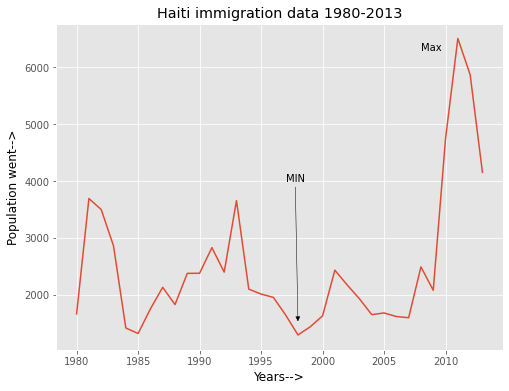

In [ ]:
years=list(map(int,range(1980,2014)))
df_can.loc['Haiti',years].plot(figsize=(8,6))
plt.title('Haiti immigration data 1980-2013')
plt.xlabel("Years-->",color='black')
plt.ylabel("Population went-->",color='black')
plt.text(2008,6300,"Max")
plt.annotate('MIN',xytext=(1997,4000),xy=(1998,1500),arrowprops={'arrowstyle':'-|>','color':'black'})
plt.show()

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.

In [ ]:
df_can.loc[['India','China'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


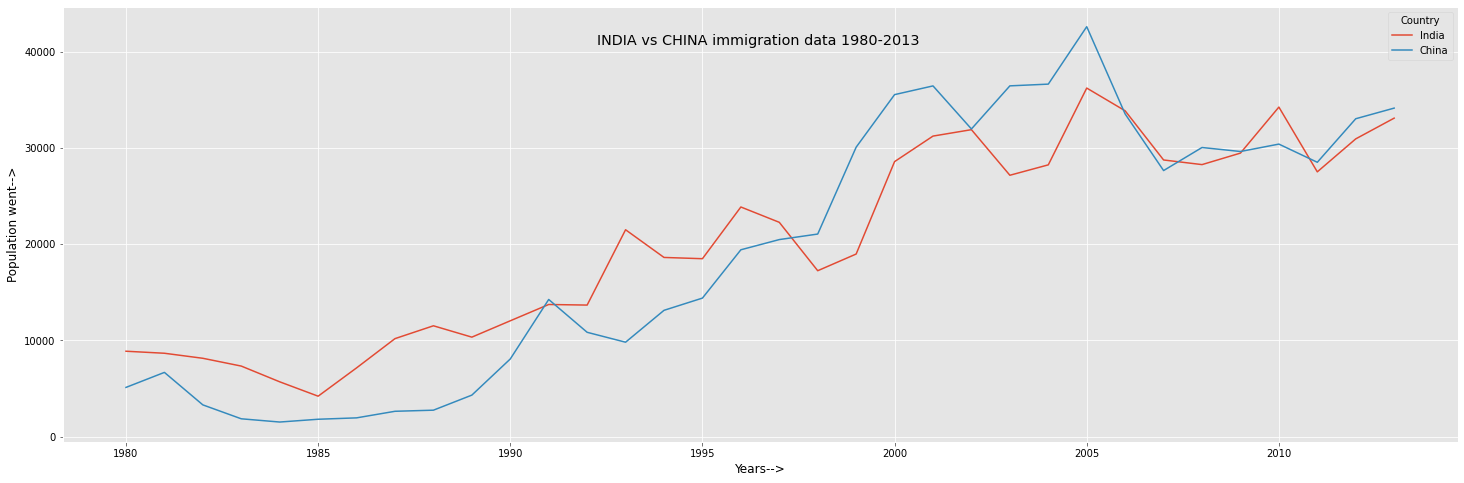

In [ ]:
df_can.loc[['India','China'],years].T.plot(figsize=(25,8))
plt.title("INDIA vs CHINA immigration data 1980-2013 ",y=.9)
plt.xlabel("Years-->",color='black')
plt.ylabel("Population went-->",color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [ ]:
df_can['Total']=df_can.sum(axis=1)

In [ ]:
df_top_5=df_can.sort_values(by='Total',ascending=False,inplace=False)

In [ ]:
df_top_5.head().T

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
Continent,Asia,Asia,Europe,Asia,Asia
Region,Southern Asia,Eastern Asia,Northern Europe,South-Eastern Asia,Southern Asia
DevName,Developing regions,Developing regions,Developed regions,Developing regions,Developing regions
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691


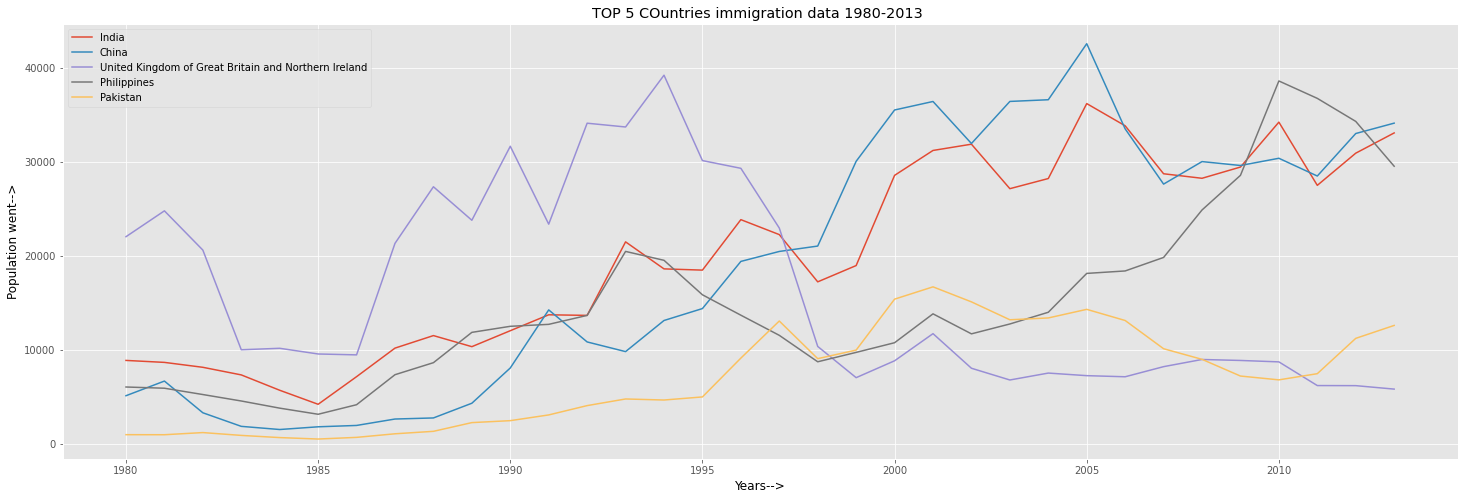

In [ ]:
df_top_5.head()[years].T.plot(figsize=(25,8),label=None)
plt.legend(labels=df_top_5.index[:5],loc='upper left')
plt.title("TOP 5 COuntries immigration data 1980-2013 ",y=1)
plt.xlabel("Years-->",color='black')
plt.ylabel("Population went-->",color='black')
plt.show()


**proper one below can be interpreted easily than above plot**

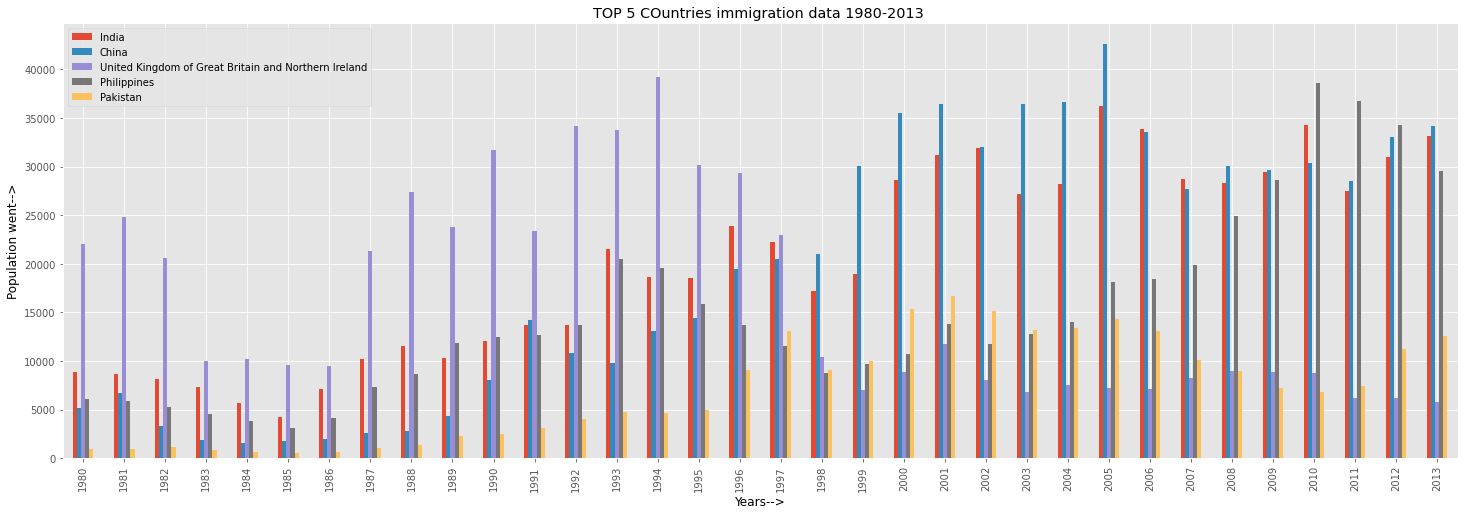

In [ ]:
df_top_5.head()[years].T.plot(kind='bar',figsize=(25,8))
plt.legend(labels=df_top_5.index[:5],loc='upper left')
plt.title("TOP 5 COuntries immigration data 1980-2013 ",y=1)
plt.xlabel("Years-->",color='black')
plt.ylabel("Population went-->",color='black')
plt.show()


# **2nd Notebook Questions**

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

In [ ]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [ ]:
df_continent=df_can.groupby('Continent').sum()

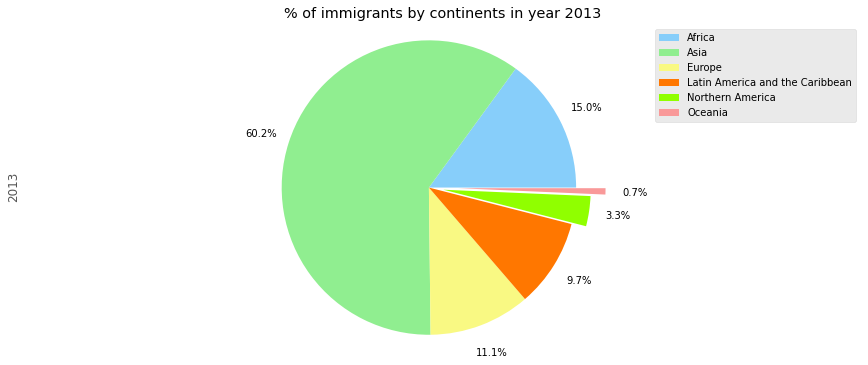

In [ ]:
color=['lightskyblue','lightgreen','#f9f983','#ff7700','#90ff00','#f99999'] 
df_continent[2013].plot(kind='pie',labels=None,figsize=(15,6),autopct="%.1f%%",pctdistance=1.2,explode=[0,0,0,0,0.1,0.2],
                        colors=color)

plt.title('% of immigrants by continents in year 2013',y=1)
plt.axis('equal')
plt.legend(labels=df_continent.index,loc='upper right')
 
plt.show()

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [ ]:
df_can.loc[['India','China'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


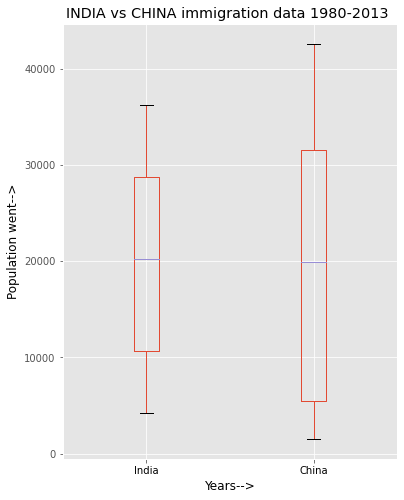

In [ ]:
df_can.loc[['India','China'],years].T.plot(kind='box',figsize=(6,8))
plt.title("INDIA vs CHINA immigration data 1980-2013 ",y=1)
plt.xlabel("Years-->",color='black')
plt.xticks(color="black")
plt.ylabel("Population went-->",color='black')
plt.show()

**Let's view the percentages associated with both countries using the `describe()` method.**

In [ ]:
df_can.loc[['India','China']].describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,7001.500000,7676.000000,5727.500000,4600.500000,3615.500000,3013.500000,4555.000000,6416.000000,7140.00000,7333.000000,10058.500000,13994.500000,12259.50000,15656.500000,15874.000000,16443.500000,21637.000000,21371.500000,19145.000000,24521.500000,32050.500000,33828.500000,31925.000000,31797.000000,32427.000000,39397.000000,33683.000000,28192.000000,29149.000000,29539.000000,32313.000000,28005.500000,31978.500000,33608.000000,675933.000000
std,2656.600177,1405.728281,3421.689714,3871.409627,2953.585025,1693.520741,3669.884194,5335.827771,6197.08383,4256.782823,2803.678387,368.402633,1998.99087,8258.300097,3883.430442,2892.773842,3142.382536,1267.842459,2692.662623,7845.349737,4919.341877,3684.733437,50.911688,6564.779357,5928.383253,4507.098623,233.345238,777.817459,1255.821643,117.379726,2718.118467,702.157034,1478.560279,736.805266,22586.404805
min,5123.000000,6682.000000,3308.000000,1863.000000,1527.000000,1816.000000,1960.000000,2643.000000,2758.00000,4323.000000,8076.000000,13734.000000,10846.00000,9817.000000,13128.000000,14398.000000,19415.000000,20475.000000,17241.000000,18974.000000,28572.000000,31223.000000,31889.000000,27155.000000,28235.000000,36210.000000,33518.000000,27642.000000,28261.000000,29456.000000,30391.000000,27509.000000,30933.000000,33087.000000,659962.000000
25%,6062.250000,7179.000000,4517.750000,3231.750000,2571.250000,2414.750000,3257.500000,4529.500000,4949.00000,5828.000000,9067.250000,13864.250000,11552.75000,12736.750000,14501.000000,15420.750000,20526.000000,20923.250000,18193.000000,21747.750000,30311.250000,32525.750000,31907.000000,29476.000000,30331.000000,37803.500000,33600.500000,27917.000000,28705.000000,29497.500000,31352.000000,27757.250000,31455.750000,33347.500000,667947.500000
50%,7001.500000,7676.000000,5727.500000,4600.500000,3615.500000,3013.500000,4555.000000,6416.000000,7140.00000,7333.000000,10058.500000,13994.500000,12259.50000,15656.500000,15874.000000,16443.500000,21637.000000,21371.500000,19145.000000,24521.500000,32050.500000,33828.500000,31925.000000,31797.000000,32427.000000,39397.000000,33683.000000,28192.000000,29149.000000,29539.000000,32313.000000,28005.500000,31978.500000,33608.000000,675933.000000
75%,7940.750000,8173.000000,6937.250000,5969.250000,4659.750000,3612.250000,5852.500000,8302.500000,9331.00000,8838.000000,11049.750000,14124.750000,12966.25000,18576.250000,17247.000000,17466.250000,22748.000000,21819.750000,20097.000000,27295.250000,33789.750000,35131.250000,31943.000000,34118.000000,34523.000000,40990.500000,33765.500000,28467.000000,29593.000000,29580.500000,33274.000000,28253.750000,32501.250000,33868.500000,683918.500000
max,8880.000000,8670.000000,8147.000000,7338.000000,5704.000000,4211.000000,7150.000000,10189.000000,11522.00000,10343.000000,12041.000000,14255.000000,13673.00000,21496.000000,18620.000000,18489.000000,23859.000000,22268.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,34235.000000,28502.000000,33024.000000,34129.000000,691904.000000


**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

In [ ]:
df_top_15=df_can.sort_values(by='Total',ascending=False,inplace=False).head(15)

In [ ]:
df_top_15.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


### Taking total of all immigrants from 1980-89 years in total 80 i.e total immigrants in 80s

#years_80 = list(map(int,range(1980,1990)))

# df_top15.loc[:, years_80].sum(axis=1) OR df_top15[years_80].sum(axis=1) both are same

In [ ]:
df_top_15['Total_immigrants_80s']=df_top_15[range(1980,1990)].sum(axis=1)

In [ ]:
df_top_15['Total_immigrants_90s']=df_top_15[range(1990,2000)].sum(axis=1)
df_top_15['Total_immigrants_20s']=df_top_15[range(2000,2014)].sum(axis=1)

In [ ]:
df_top_15.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total,Total_immigrants_80s,Total_immigrants_90s,Total_immigrants_20s
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904,82154,180395,429355
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962,32003,161528,466431


In [ ]:
df_decades_top_15=pd.DataFrame({'80s':df_top_15['Total_immigrants_80s'],'90s':df_top_15['Total_immigrants_90s'],
                                '20s':df_top_15['Total_immigrants_20s']})
df_decades_top_15.head()

,80s,90s,20s
Country,,,
India,82154,180395,429355
China,32003,161528,466431
United Kingdom of Great Britain and Northern Ireland,179171,261966,110363
Philippines,60764,138482,312145
Pakistan,10591,65302,165707


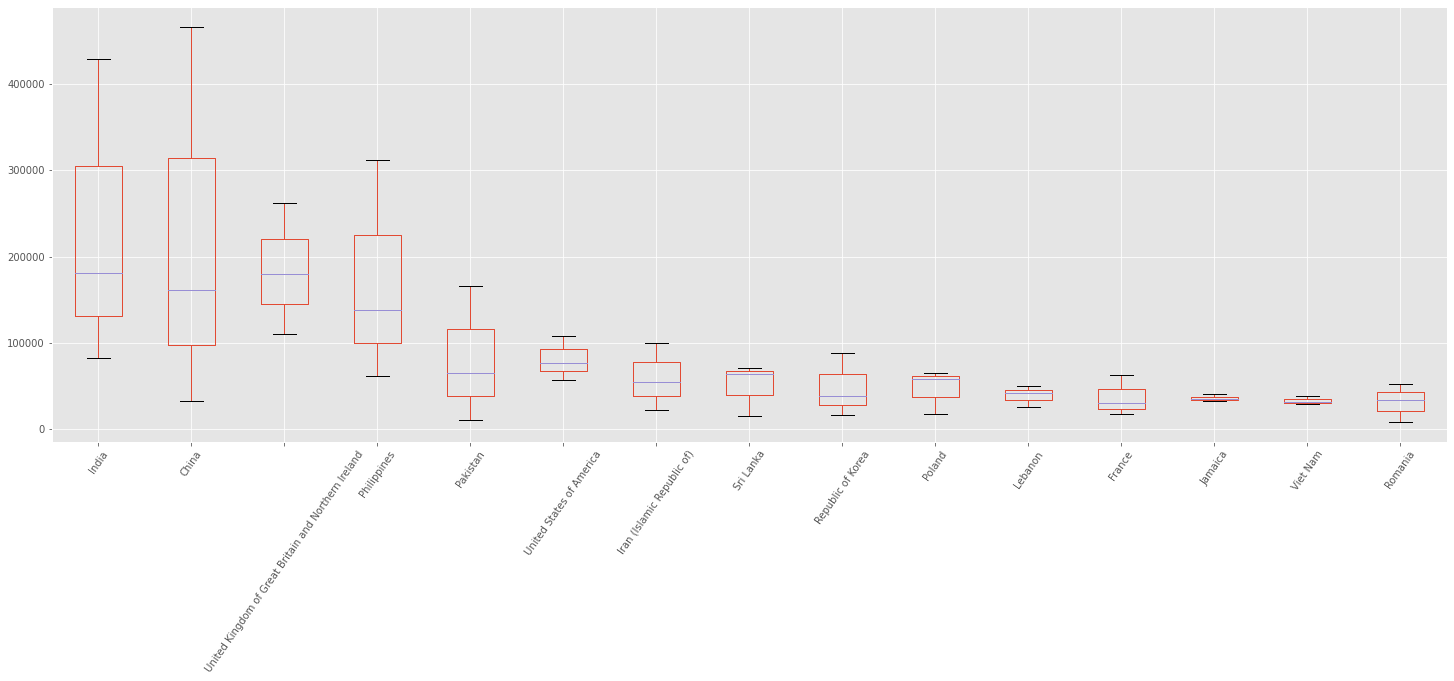

In [ ]:
df_decades_top_15.T.plot(kind='box',figsize=(25,8))
  plt.xticks(rotation=55)
  plt.show()

# SIR SUBPLOT WORK NHI KAR RAHA HAI 

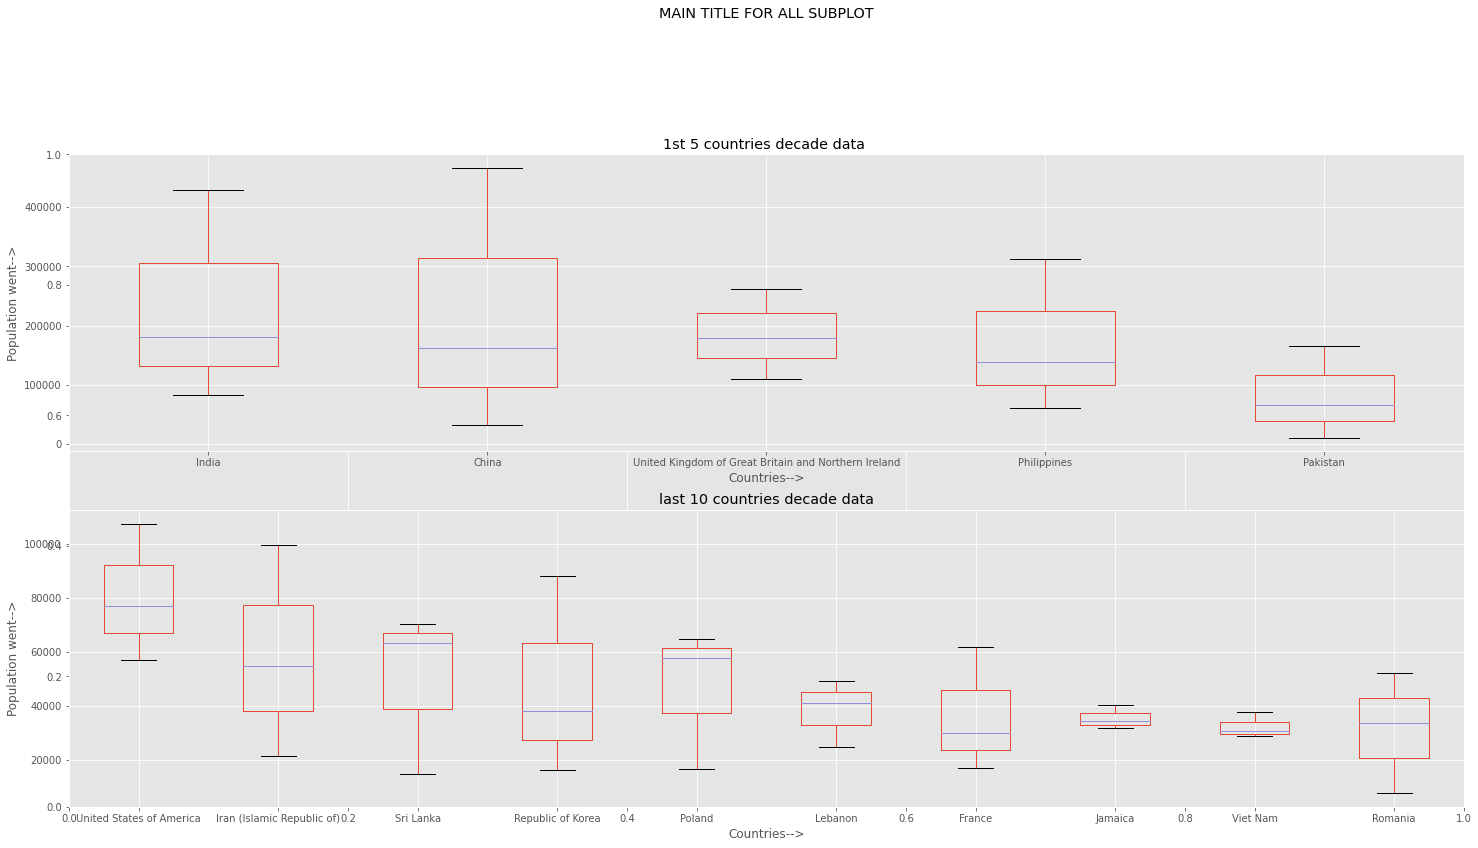

In [ ]:
# plot() me jab ax=ax0 aur ax=ax1 mention kar raha hu tho plot show hi nhi kar raha hai
# xlabels in plot 2 rotate nhi ho rahe
 
fig = plt.figure()
plt.title("MAIN TITLE FOR ALL SUBPLOT",y=1.2)
ax0 = fig.add_subplot(2, 1, 1) 
ax1 = fig.add_subplot(2, 1, 2) 
#subplot 1
df_decades_top_15.head().T.plot(kind='box', figsize=(25, 12),ax=ax0)

ax0.set_title('1st 5 countries decade data ')
ax0.set_ylabel('Population went-->')
ax0.set_xlabel('Countries-->')

#subplot 2
df_decades_top_15.tail(10).T.plot(kind='box', figsize=(25,12),ax=ax1)
ax1.set_title('last 10 countries decade data')
ax1.set_ylabel('Population went-->')
ax1.set_xlabel('Countries-->')
#positions_x=range(10) #positioning of x labels
#labels_x = df_decades_top_15.index[6:16] 
#ax1.set_xticklabels(labels_x,rotation=90)

plt.show()

In [ ]:
d_top5=df_can.sort_values(by='Total',axis=0,ascending=False,inplace=False)

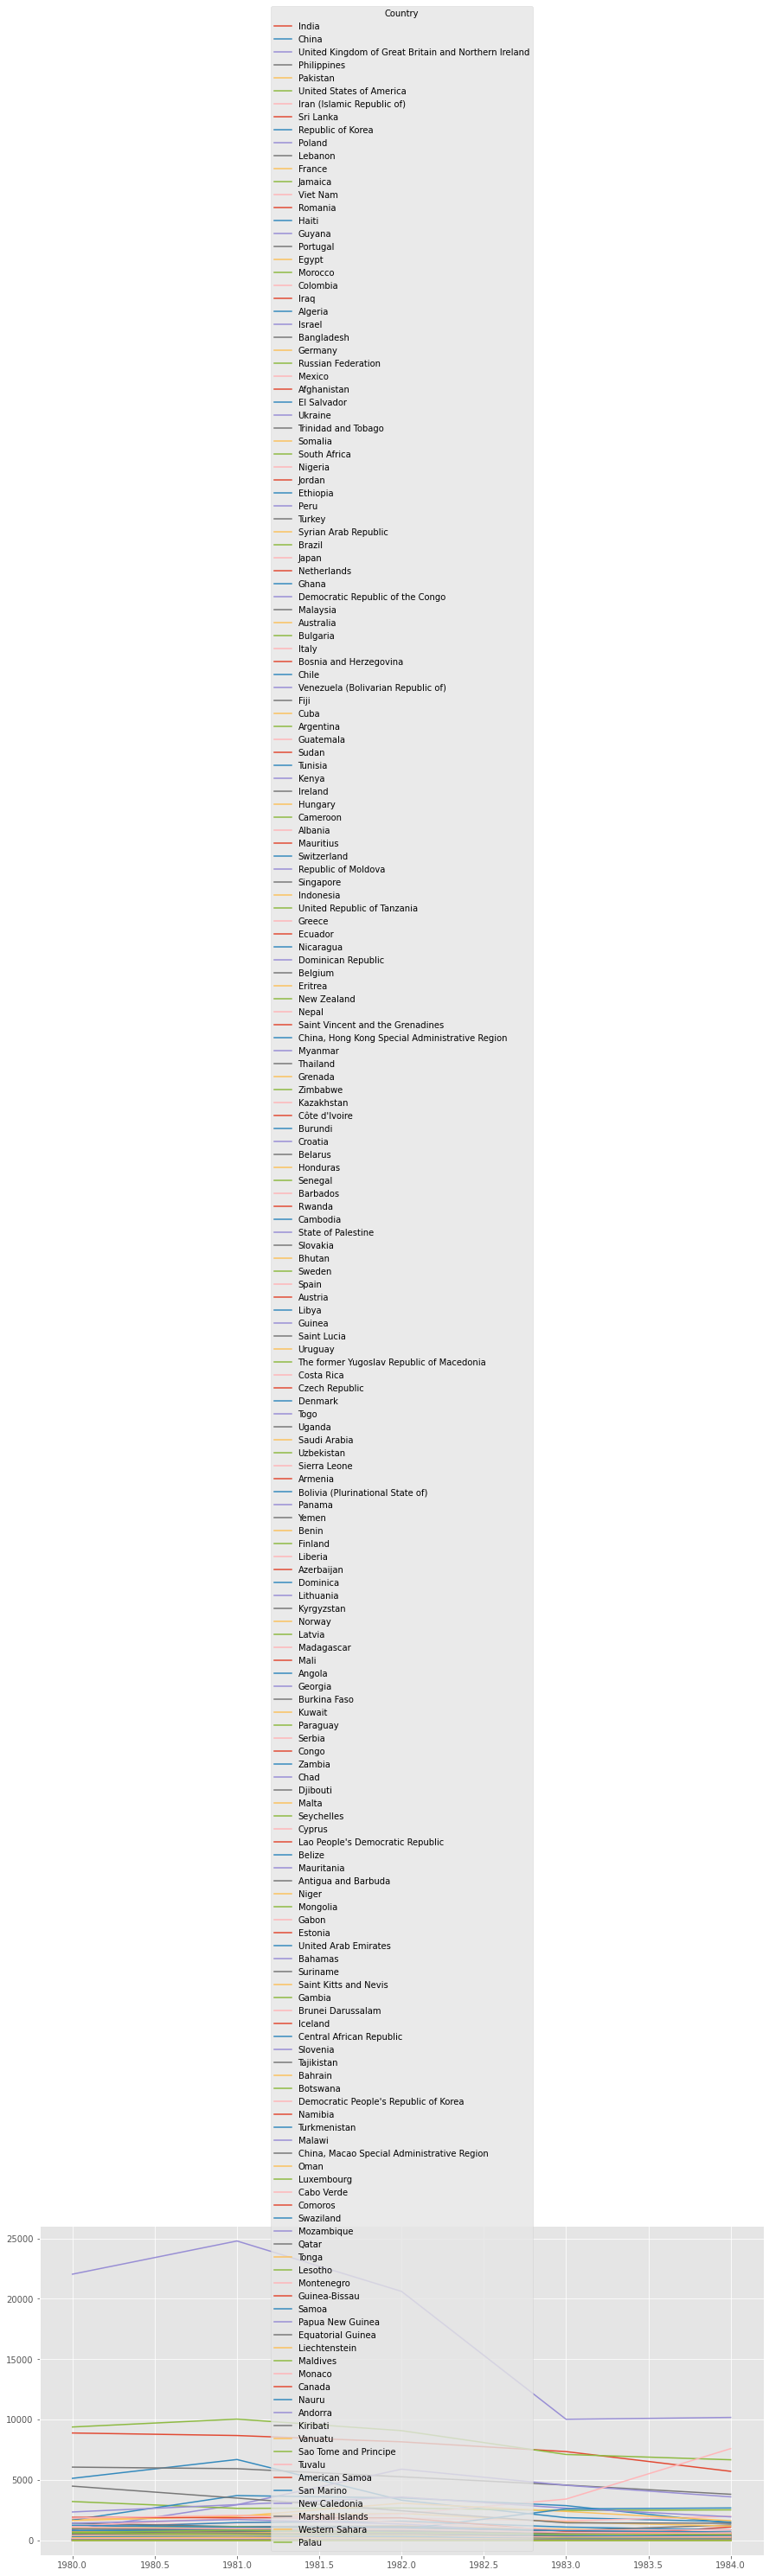

In [ ]:
d_top5=d_top5[years].T
d_top5.head().plot(kind='line',figsize=(15,7))

In [ ]:
d_top5.shape

(34, 195)